In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

## 데이터셋 불러오기

* mnist.load_data() 함수는 MNIST 데이터셋을 로드하는 역할을 합니다. 이 함수를 호출하면 MNIST 데이터셋이 훈련(train) 및 테스트(test) 데이터로 분할되어 반환됩니다.

* x_train은 훈련 데이터의 이미지 샘플을 포함하는 NumPy 배열입니다. 각 이미지는 28x28 픽셀 크기의 흑백 이미지입니다. 따라서 x_train은 (데이터 개수, 28, 28) 모양의 3차원 배열입니다.

* y_train은 훈련 데이터의 레이블 또는 클래스 정보를 포함하는 NumPy 배열입니다. 각 레이블은 해당 이미지의 숫자를 나타냅니다. 예를 들어, 숫자 0의 이미지는 레이블 0에 해당합니다. y_train은 훈련 데이터에 대한 레이블이 모여 있는 1차원 배열입니다.

* x_test와 y_test는 테스트 데이터의 이미지와 레이블을 나타내며, 훈련 데이터와 동일한 형식을 갖습니다.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
image = x_train[0]
image.shape

(28, 28, 1)

## 데이터 확인

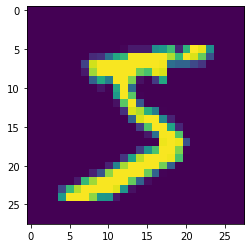

In [14]:
import matplotlib.pyplot as plt
plt.imshow(image)

## 데이터 형변환

In [15]:
image = image.reshape(1,28,28,1)
image.shape

(1, 28, 28, 1)

* 첫 번째 차원 (1): 이 배열은 배치(batch)로 처리되었음을 나타냅니다. 즉, 하나의 이미지만을 처리한다는 의미입니다.
* 두 번째 차원 (28): 이미지의 높이(height)를 나타냅니다. 28픽셀입니다.
* 세 번째 차원 (28): 이미지의 너비(width)를 나타냅니다. 28픽셀입니다.
* 네 번째 차원 (1): 이미지의 채널 수를 나타냅니다. 이 경우, 흑백 이미지이므로 채널 수가 1입니다.
따라서 이 형태의 배열은 하나의 흑백 이미지를 나타내며, CNN 모델에 입력으로 사용할 수 있습니다. 각 픽셀은 0에서 1 사이의 부동소수점 값으로 표현되어야 합니다.

## Conv2D Layer

In [19]:
conv_layer = Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation='relu',
                    input_shape=(28,28,1))


* Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)) 는 2차원 합성곱 레이어를 추가하는 부분입니다.
* 32 는 이 레이어에서 생성할 필터(또는 커널)의 수를 나타냅니다. 이 필터들은 입력 이미지에서 특징을 감지합니다.
* kernel_size=(3, 3) 는 각 필터의 크기를 정의합니다. 이 경우, 3x3 크기의 필터를 사용하여 이미지에서 작은 특징을 감지합니다.
* activation='relu' 는 활성화 함수로 ReLU (Rectified Linear Unit) 함수를 사용한다는 것을 나타냅니다. ReLU는 음수 값을 0으로 만들고 양수 값을 그대로 유지하여 비선형성을 도입합니다.
* input_shape=(28, 28, 1) 는 입력 이미지의 모양(shape)을 정의합니다. 이 경우, 28x28 크기의 이미지이며, 채널 수가 1인 흑백 이미지입니다.

In [20]:
response = conv_layer(image)
response.shape

TensorShape([1, 26, 26, 32])

## Pooling Layer


In [22]:
pooling = MaxPooling2D(pool_size=(2,2))
response = pooling(response)
response.shape

TensorShape([1, 13, 13, 32])

MaxPooling2D(pool_size=(2, 2)) 는 최대 풀링(Max Pooling) 레이어를 추가하는 부분입니다.
* MaxPooling은 입력 이미지를 격자로 나누어 각 격자 영역에서 가장 큰 값을 선택하여 이미지의 크기를 줄입니다. 이는 공간적인 계층 구조를 학습하는 데 도움이 됩니다.
* pool_size=(2, 2) 는 풀링 영역의 크기를 정의합니다. 이 경우, 2x2 크기의 영역에서 최대 값을 선택합니다.

## Flatten Layer

위의 코드는 신경망 모델에서 사용되는 Flatten 연산을 수행하는 코드입니다. Flatten 연산은 입력 데이터의 차원을 변경하여 평평한 1차원 벡터로 변환합니다.

In [25]:
flatten = Flatten()
response = flatten(response)

In [26]:
response.shape

TensorShape([1, 5408])